## Import Libraries

In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline  
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2

## Normal Dice

#### Numpy Array

In [246]:
def read_img(num1, num2):
    num1 = str(num1)
    num2 = str(num2)+'.png'
    img = cv2.imread("C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\"+num1+"\\16_09_21_"+num1+"_"+num2,0)
    return img
    
img_00 = read_img('00','020')
img_01 = read_img('01','011')
img_02 = read_img('02', '011')
img_03 = read_img('03','000')
img_04 = read_img('04','011')
img_05 = read_img('05','011')
img_06 = read_img('06','000')

In [282]:
def read_ano_img(num):
    num = str(num)+'.png'
    img = cv2.imread("C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\ano\\17_11_21_anomalies_"+num,0)
    return img

In [283]:
img_ano = read_ano_img('042')

In [284]:
img_ano

array([[22, 22, 23, ..., 33, 30, 28],
       [22, 22, 23, ..., 32, 30, 31],
       [22, 22, 22, ..., 32, 33, 38],
       ...,
       [46, 48, 49, ..., 52, 53, 54],
       [47, 48, 47, ..., 55, 55, 56],
       [45, 45, 43, ..., 57, 56, 57]], dtype=uint8)

In [5]:
img_00

array([[28, 27, 27, ..., 20, 22, 25],
       [26, 25, 25, ..., 26, 24, 23],
       [24, 23, 24, ..., 27, 26, 24],
       ...,
       [38, 41, 47, ..., 54, 49, 44],
       [38, 41, 45, ..., 48, 44, 42],
       [37, 39, 41, ..., 42, 43, 42]], dtype=uint8)

#### Image

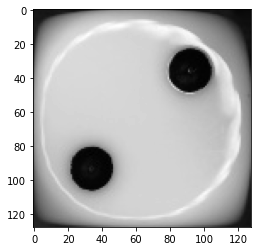

In [6]:
plt.imshow(img_01, cmap='gray')

In [7]:
unique, counts = np.unique(img_00, return_counts=True)

(array([26., 25., 25., 26., 25., 25., 26., 25., 25., 26.]),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]),
 <BarContainer object of 10 artists>)

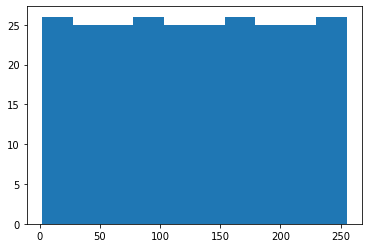

In [8]:
plt.hist(unique)

In [9]:
np.histogram(img_00)

(array([ 791,  445,  321,  287,  435,  632, 1156, 1891, 8464, 1962],
       dtype=int64),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]))

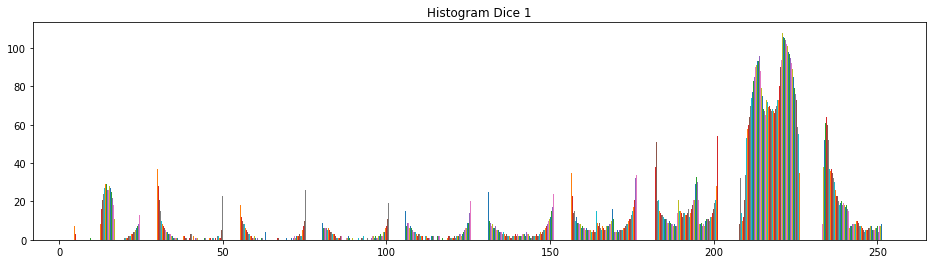

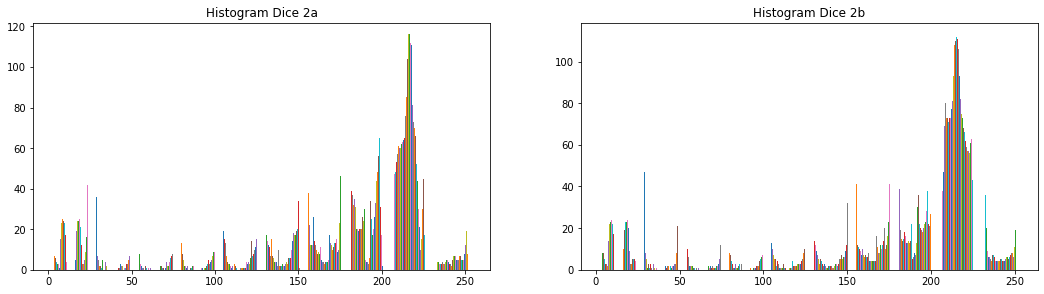

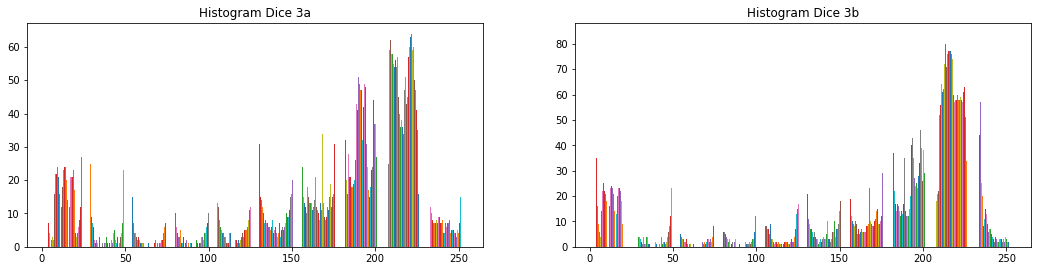

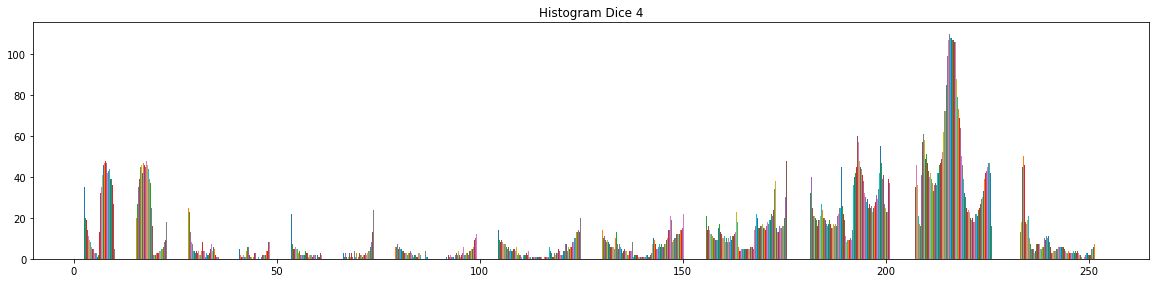

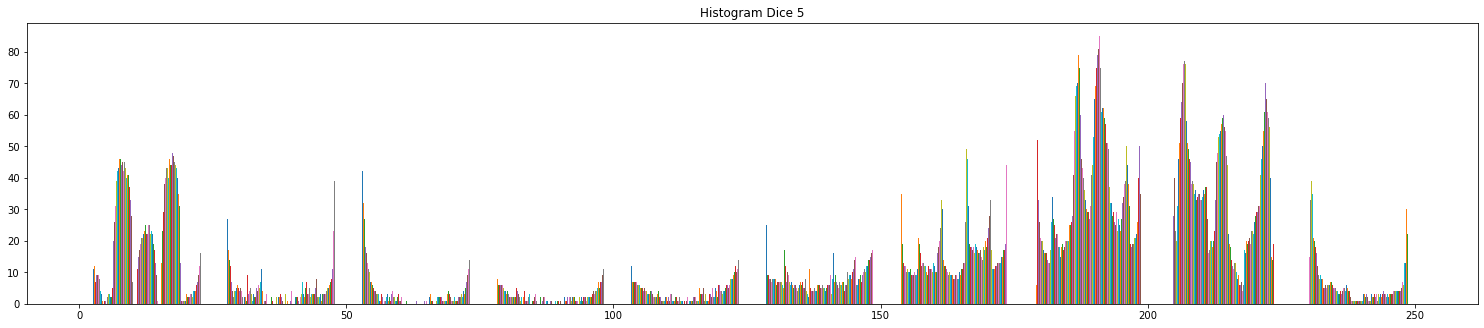

In [10]:
plt.figure(1, figsize=(16,4))
plt.subplot(111)
plt.hist(img_00) 
plt.title("Histogram Dice 1") 
plt.show()

plt.figure(1, figsize=(18,10))
ax = plt.subplot(2,2,1)
plt.hist(img_01) 
plt.title("Histogram Dice 2a") 


ax = plt.subplot(2,2,2)
plt.hist(img_02) 
plt.title("Histogram Dice 2b") 
plt.show()

plt.figure(1, figsize=(18,14))
ax = plt.subplot(3,2,1)
plt.hist(img_03) 
plt.title("Histogram Dice 3a") 


ax = plt.subplot(3,2,2)
plt.hist(img_04) 
plt.title("Histogram Dice 3b") 
plt.show()

plt.figure(1, figsize=(20,20))
ax = plt.subplot(4,1,1)
plt.hist(img_05) 
plt.title("Histogram Dice 4") 
plt.show()

plt.figure(1, figsize=(26,30))
ax = plt.subplot(5,1,1)
plt.hist(img_06) 
plt.title("Histogram Dice 5") 
plt.show()


#### Decimal RGB colour code:
* Black : (0, 0, 0)
* White : (255, 255, 255)
* Gray : (128, 128, 128)

### Creating Templates

In [11]:
import glob

In [12]:
def list_img(num):
    num = str(num)
    path_num = "C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\"+num
    list_num = []
    for filename in glob.iglob(f'{path_num}/*'):
        img = cv2.imread(filename, 0)
        list_num.append(img)
    return list_num




In [13]:
array_00 = np.array(list_img('00'))
array_01 = np.array(list_img('01'))
array_02 = np.array(list_img('02'))
array_03 = np.array(list_img('03'))
array_04 = np.array(list_img('04'))
array_05 = np.array(list_img('05'))
array_06 = np.array(list_img('06'))
array_07 = np.array(list_img('07'))
array_08 = np.array(list_img('08'))
array_09 = np.array(list_img('09'))
array_10 = np.array(list_img('10'))

In [182]:
template_00 = np.mean(array_00, axis=0)

In [183]:
array_00.shape

(737, 128, 128)

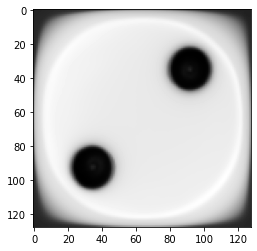

In [16]:
template_01 = plt.imshow(np.mean(array_01, axis=0), cmap='gray')

In [239]:
def template(num):
    num = str(num)
    t = np.mean(list_img(num), axis=0)
    return t

In [240]:
temp= {}
temp['00'] = template('00')
temp['01'] = template('01')
temp['02']= template('02')
temp['03'] = template('03')
temp['04'] = template('04')
temp['05'] = template('05')
temp['06'] = template('06')
temp['07'] = template('07')
temp['08'] = template('08')
temp['09'] = template('09')
temp['10'] = template('10')

In [242]:
temp['00']

array([[40.92944369, 41.43962008, 41.65671642, ..., 36.78561737,
        37.10583446, 37.34735414],
       [41.36906377, 41.66214383, 42.12618725, ..., 37.12211669,
        37.23609227, 37.15603799],
       [41.87109905, 42.0624152 , 42.52374491, ..., 37.30393487,
        37.53052917, 37.35006784],
       ...,
       [34.59158752, 34.81139756, 35.14789688, ..., 41.6797829 ,
        41.31343284, 40.56173677],
       [34.20352782, 34.39755767, 34.78561737, ..., 41.36092266,
        40.90502035, 40.26187246],
       [33.89959294, 34.14654003, 34.40162822, ..., 40.86024423,
        40.54002714, 40.21709634]])

In [19]:
img_00.shape

(128, 128)

In [243]:
temp['00'].shape

(128, 128)

### Template Matching using OpenCV

In [277]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = img_ano.astype('float32')
template = temp['00'].astype('float32')
w, h = template.shape[::-1]
w,h = (120,110)

res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img)
res[0][0]

0.65704054

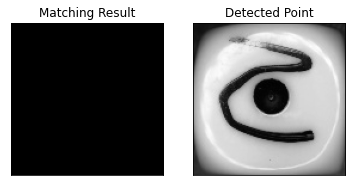

In [278]:
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

Source: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

In [23]:
diff = img_00-template_00

In [24]:
diff.max()

114.34057

In [25]:
def max_diff():
    path = "C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\05"
    list_max = []
    for filename in glob.iglob(f'{path}/*'):
        img = cv2.imread(filename, 0)
        diff = (img -template_00).max()
        list_max.append(diff)
    return list_max

In [26]:
m = max_diff()

In [27]:
for pixels in diff:
    a = np.where(diff < 100)

In [28]:
a

(array([  0,   0,   0, ..., 127, 127, 127], dtype=int64),
 array([  0,   1,   2, ..., 125, 126, 127], dtype=int64))

In [29]:
def match_temp():
    path = "C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\06"
    match_list = []
    for filename in glob.iglob(f'{path}/*'):
        img = cv2.imread(filename, 0)
        diff = img-template_00
        for d in diff:
            if d.max() < 100:
                result = True
            else:
                result = False
            match_list.append(result)
    return match_list

In [30]:
g = match_temp()

### SSIM

In [31]:
# Compute the Structural Similarity Index (SSIM) between the two
#    images, ensuring that the difference image is returned
(score, diff) = structural_similarity(img_00, template_00, full=True)
diff = (diff * 255).astype("uint8")

# 6. You can print only the score if you want
print("SSIM: {}".format(score))

SSIM: 0.8393786844962338


C:\Users\Nichelle Machado\.conda\envs\ComputerVision\lib\site-packages\skimage\_shared\utils.py:293: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [32]:
score

0.8393786844962338

In [72]:
def ssim(num1, num2):
    path = "C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\"+num1
    list_ssim = []
    for filename in glob.iglob(f'{path}/*'):
        img = cv2.imread(filename, 0)
        (score, diff) = structural_similarity(img, template[num2], full=True)
        diff = (diff * 255).astype("uint8")
        list_ssim.append(score)
    return list_ssim

In [ ]:
list1 = ['00','01','02','03','04','05','06','07','08','09','10']
ssim_list = []
for num1 in list1:
    for num2 in list1:
        ssim_n = ssim(num1, num2)
        ssim_list.append(ssim_n)
        
        

In [73]:
ssim_00 = ssim('00', '00')
ssim_01 = ssim('01','00')
ssim_02 = ssim('02','00')
ssim_03 = ssim('03','00')
ssim_04 = ssim('04','00')
ssim_05 = ssim('05','00')
ssim_06 = ssim('06','00')
ssim_07 = ssim('07','00')
ssim_08 = ssim('08','00')
ssim_09 = ssim('09','00')
ssim_10 = ssim('10','00')
ssim_ano = ssim('ano','00')


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [35]:
# Threshold = 0.84

In [36]:
import pandas as pd

In [37]:
df_00 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['00','01','02','03','04','05','06','07','08','09','10'])

In [38]:
df_00[df_00>0.84].count()

00      0
01    317
02      0
03      2
04      0
05      0
06      0
07      0
08      0
09      0
10      0
dtype: int64

### Folder 00
True positives = 311
False negatives = 87

In [39]:
df_00
df_00.to_csv('df_00.csv', sep=';')

In [40]:
df_01 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [41]:
df_01.to_csv('df_01.csv', sep=';')

In [42]:
df_01[df_01>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

### Folder 01
True positives = 317
False negatives = 81

In [43]:
df_02 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [44]:
df_02[df_02.iloc[:, 1:11]>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

In [45]:
df_02.to_csv('df_02.csv', sep=';')

In [46]:
df_02[df_02>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

### Folder 02
True positives = 381
False negatives = 17

In [47]:
df_03 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [48]:
df_03.describe()

,1,2a,2b,3a,3b,4,5,6a,6b,6c,6d
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.671278,0.868487,0.641171,0.784453,0.557160,0.715568,0.646925,0.502001,0.497424,0.499599,0.496077
std,0.026194,0.038637,0.017736,0.031141,0.026469,0.029936,0.026348,0.022401,0.021458,0.021066,0.018728
min,0.586772,0.721289,0.594557,0.709092,0.483310,0.612755,0.569903,0.421510,0.432216,0.427581,0.443112
25%,0.657447,0.846263,0.627743,0.762259,0.538714,0.696593,0.625090,0.491083,0.489050,0.487304,0.485225
50%,0.675985,0.880006,0.644579,0.787298,0.564674,0.717269,0.654782,0.505796,0.502413,0.505493,0.499618
75%,0.689142,0.897265,0.655705,0.808135,0.578724,0.740891,0.667578,0.517115,0.512183,0.515416,0.509465
max,0.717184,0.925027,0.672641,0.843208,0.595586,0.765068,0.689205,0.558736,0.539901,0.546071,0.532905


In [49]:
df_03[df_03>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

### Folder 03
True positives = 260
False negatives = 138

In [50]:
df_03.to_csv('df_03.csv', sep=';')

In [51]:
df_04 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [52]:
df_04[df_04>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

### Folder 04
True positives = 241
False negatives = 156
False positive = 1

In [53]:
df_04.to_csv('df_04.csv', sep=';')

In [54]:
df_05 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [55]:
df_05[df_05>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

### Folder 05
True positives = 133
False negatives = 265

In [56]:
df_05.to_csv('df_05.csv', sep=';')

In [57]:
df_06 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [58]:
df_06[df_06>0.84].count()

1       0
2a    317
2b      0
3a      2
3b      0
4       0
5       0
6a      0
6b      0
6c      0
6d      0
dtype: int64

### Folder 6
True positives = 90
False negatives = 308

In [ ]:
df_06.to_csv('df_06.csv', sep=';')

In [ ]:
df_07 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [ ]:
df_07[df_07>0.84].count()

### Folder 7
True positives = 229
False negatives = 169

In [ ]:
df_07.to_csv('df_07.csv', sep=';')

In [ ]:
df_08 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [ ]:
df_08[df_08>0.84].count()

### Folder 8
True positives = 220
False negatives = 178

In [ ]:
df_08.to_csv('df_08.csv', sep=';')

In [ ]:
df_09 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [ ]:
df_09[df_09>0.70].count()

### Folder 9
True positves = 395
False negatives = 3

In [ ]:
df_09.to_csv('df_09.csv', sep=';')

In [ ]:
df_10 = pd.DataFrame(list(zip(ssim_00, ssim_01,ssim_02, ssim_03, ssim_04, ssim_05, ssim_06,ssim_07,ssim_08, ssim_09,ssim_10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])

In [ ]:
df_10[df_10>0.84].count()

### Folder 10
True positives = 216
False negatives = 182

In [ ]:
df_10.to_csv('df_10.csv', sep=';')

In [ ]:
df_01

In [ ]:
# Checking the min and max ssim score for the images in each of the folders
df_10.describe()

In [66]:
# Comparing Anomaly folder with templates of all the dice faces

def ssim_ano(num): # setting template number as the input argument
    path = "C:\\Users\\Nichelle Machado\\Becode Projects\\becode_dice_data\\train_set\\ano" #path of the anomalous folder(source image)
    list_ssim = []
    for filename in glob.iglob(f'{path}/*'):
        img = cv2.imread(filename, 0)
        (score, diff) = structural_similarity(img, template(num), full=True) #matching source image and template
        diff = (diff * 255).astype("uint8")
        list_ssim.append(score)
    return list_ssim

In [67]:
ssim_ano00 = ssim_ano('00')
ssim_ano01 = ssim_ano('01')
ssim_ano02 = ssim_ano('02')
ssim_ano03 = ssim_ano('03')
ssim_ano04 = ssim_ano('04')
ssim_ano05 = ssim_ano('05')
ssim_ano06 = ssim_ano('06')
ssim_ano07 = ssim_ano('07')
ssim_ano08 = ssim_ano('08')
ssim_ano09 = ssim_ano('09')
ssim_ano10 = ssim_ano('10')

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
df_ano = pd.DataFrame(list(zip(ssim_ano00, ssim_ano01,ssim_ano02, ssim_ano03, ssim_ano04, ssim_ano05, ssim_ano06,ssim_ano07,ssim_ano08, ssim_ano09,ssim_ano10)), columns=['1','2a','2b','3a','3b','4','5','6a','6b','6c','6d'])
df_ano

In [ ]:
df_ano.to_csv('df_ano',sep=';')

In [ ]:
# Checking Structural Similarity Index score that is higher than 0.75(threshold)

df_ano[df_ano > 0.70].count()

## Anomalous Dice

In [ ]:
plt.hist(img_a) 
plt.title("Histogram") 
plt.show()

### F1 Score

In [60]:
True_Positives = 2793
False_Positives = 1
False_Negatives = 1584

Precision = TruePositives / (TruePositives + FalsePositives)
Recall = TruePositives / (TruePositives + FalseNegatives)
F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [62]:
Precision = True_Positives / (True_Positives + False_Positives)
Recall = True_Positives / (True_Positives + False_Negatives)

In [63]:
Precision

0.9996420901932713

In [64]:
Recall

0.6381082933516107

In [65]:
(2*Precision*Recall) / (Precision+Recall)

0.7789708548319619